In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2023-01-28 18:41:25.708978: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
DATAPATH = '/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/'
images, labels = C.Helper.load(DATAPATH)

In [4]:
images, labels = C.Helper.shuffle(images, labels)

In [5]:
images, labels = C.Helper.normalize(images, labels)

In [6]:
X_train, X_val, y_train, y_val = C.Helper.split(images, labels, val_size=0.2)

In [7]:
train_gen = C.Helper.augment(X_train, y_train)

In [ ]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_val, y_val, epochs=200)

2023-01-28 18:44:20.396869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-28 18:44:20.398332: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245645000 Hz


Epoch 1/200


2023-01-28 18:44:21.692992: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-01-28 18:44:22.408458: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-01-28 18:44:23.135794: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-01-28 18:44:23.135819: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-01-28 18:44:23.135888: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-28 18:44:23.217054: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-01-28 18:44:23.919205: I tensorflow/stream_exec

13/13 [==============================] - 48s 2s/step - loss: 1.6822 - iou: 9.4133e-05 - iou_thresholded: 5.3495e-04 - val_loss: 0.0496 - val_iou: 7.2680e-06 - val_iou_thresholded: 7.0619e-04
Epoch 2/200
13/13 [==============================] - 13s 973ms/step - loss: 0.0408 - iou: 1.4156e-04 - iou_thresholded: 4.7853e-04 - val_loss: 0.0047 - val_iou: 6.8168e-04 - val_iou_thresholded: 0.0011
Epoch 3/200
13/13 [==============================] - 13s 967ms/step - loss: 0.0040 - iou: 2.3719e-04 - iou_thresholded: 5.8393e-04 - val_loss: 0.0029 - val_iou: 6.2098e-04 - val_iou_thresholded: 0.0011
Epoch 4/200
13/13 [==============================] - 13s 967ms/step - loss: 0.0028 - iou: 3.2015e-04 - iou_thresholded: 5.4456e-04 - val_loss: 0.0025 - val_iou: 6.5262e-04 - val_iou_thresholded: 0.0011
Epoch 5/200
13/13 [==============================] - 13s 969ms/step - loss: 0.0024 - iou: 4.0280e-04 - iou_thresholded: 5.5390e-04 - val_loss: 0.0023 - val_iou: 8.3138e-04 - val_iou_thresholded: 0.0011
E

13/13 [==============================] - 13s 968ms/step - loss: 5.2664e-04 - iou: 0.2554 - iou_thresholded: 0.3451 - val_loss: 5.3880e-04 - val_iou: 0.2492 - val_iou_thresholded: 0.3143
Epoch 43/200
13/13 [==============================] - 13s 967ms/step - loss: 5.0647e-04 - iou: 0.2651 - iou_thresholded: 0.3650 - val_loss: 5.0492e-04 - val_iou: 0.2822 - val_iou_thresholded: 0.3915
Epoch 44/200
13/13 [==============================] - 13s 965ms/step - loss: 5.2214e-04 - iou: 0.2693 - iou_thresholded: 0.3712 - val_loss: 5.1761e-04 - val_iou: 0.2705 - val_iou_thresholded: 0.3289
Epoch 45/200
13/13 [==============================] - 13s 971ms/step - loss: 4.9824e-04 - iou: 0.2794 - iou_thresholded: 0.3762 - val_loss: 5.3729e-04 - val_iou: 0.2712 - val_iou_thresholded: 0.3131
Epoch 46/200
13/13 [==============================] - 13s 966ms/step - loss: 4.6846e-04 - iou: 0.2992 - iou_thresholded: 0.4074 - val_loss: 5.1754e-04 - val_iou: 0.2845 - val_iou_thresholded: 0.3222
Epoch 47/200
13/13

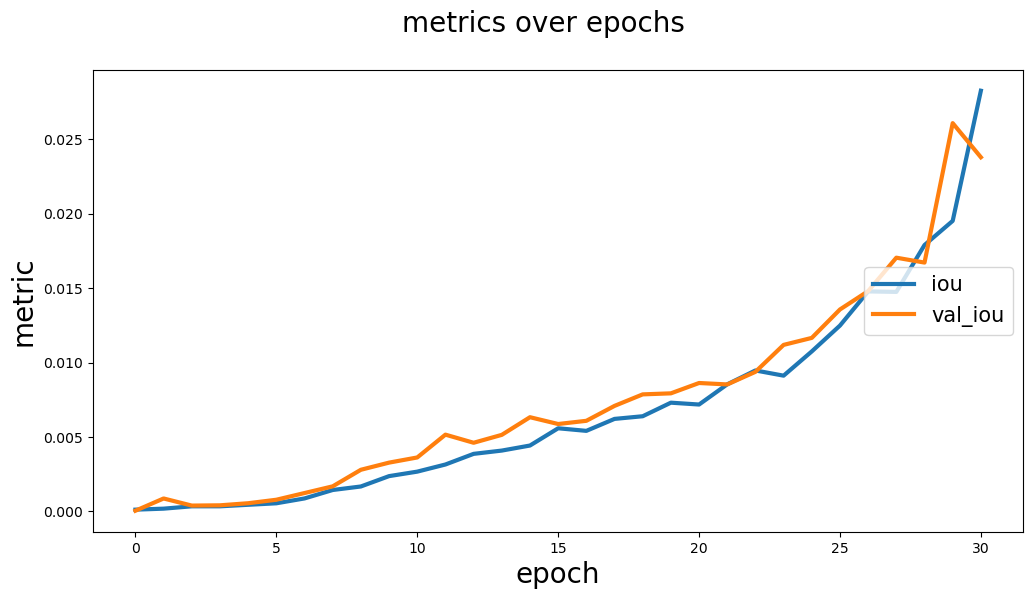

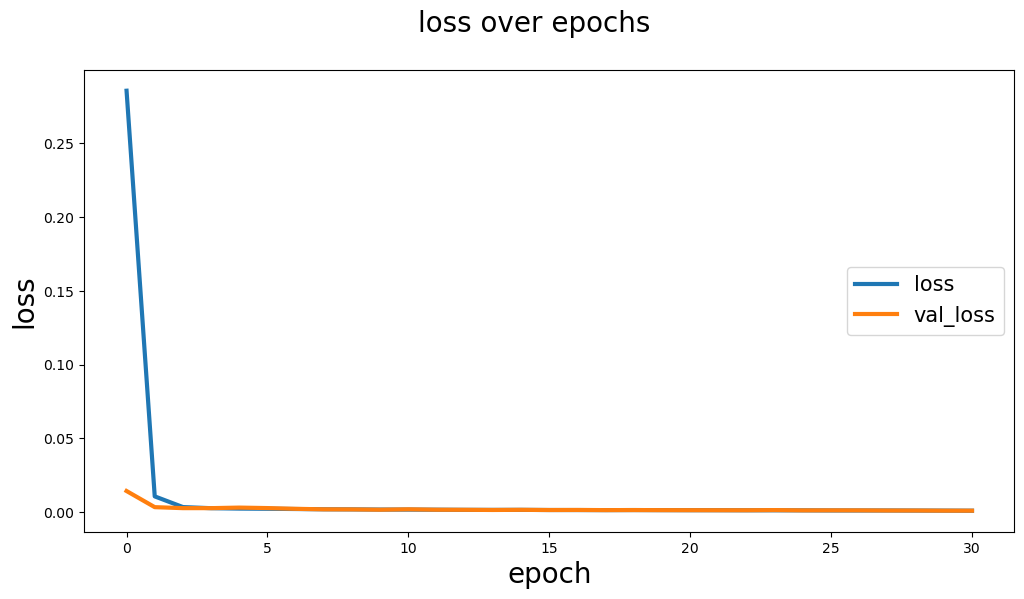

In [9]:
from keras_unet.utils import plot_segm_history
plot_segm_history(history)

In [10]:
y_pred = model.predict(X_val)

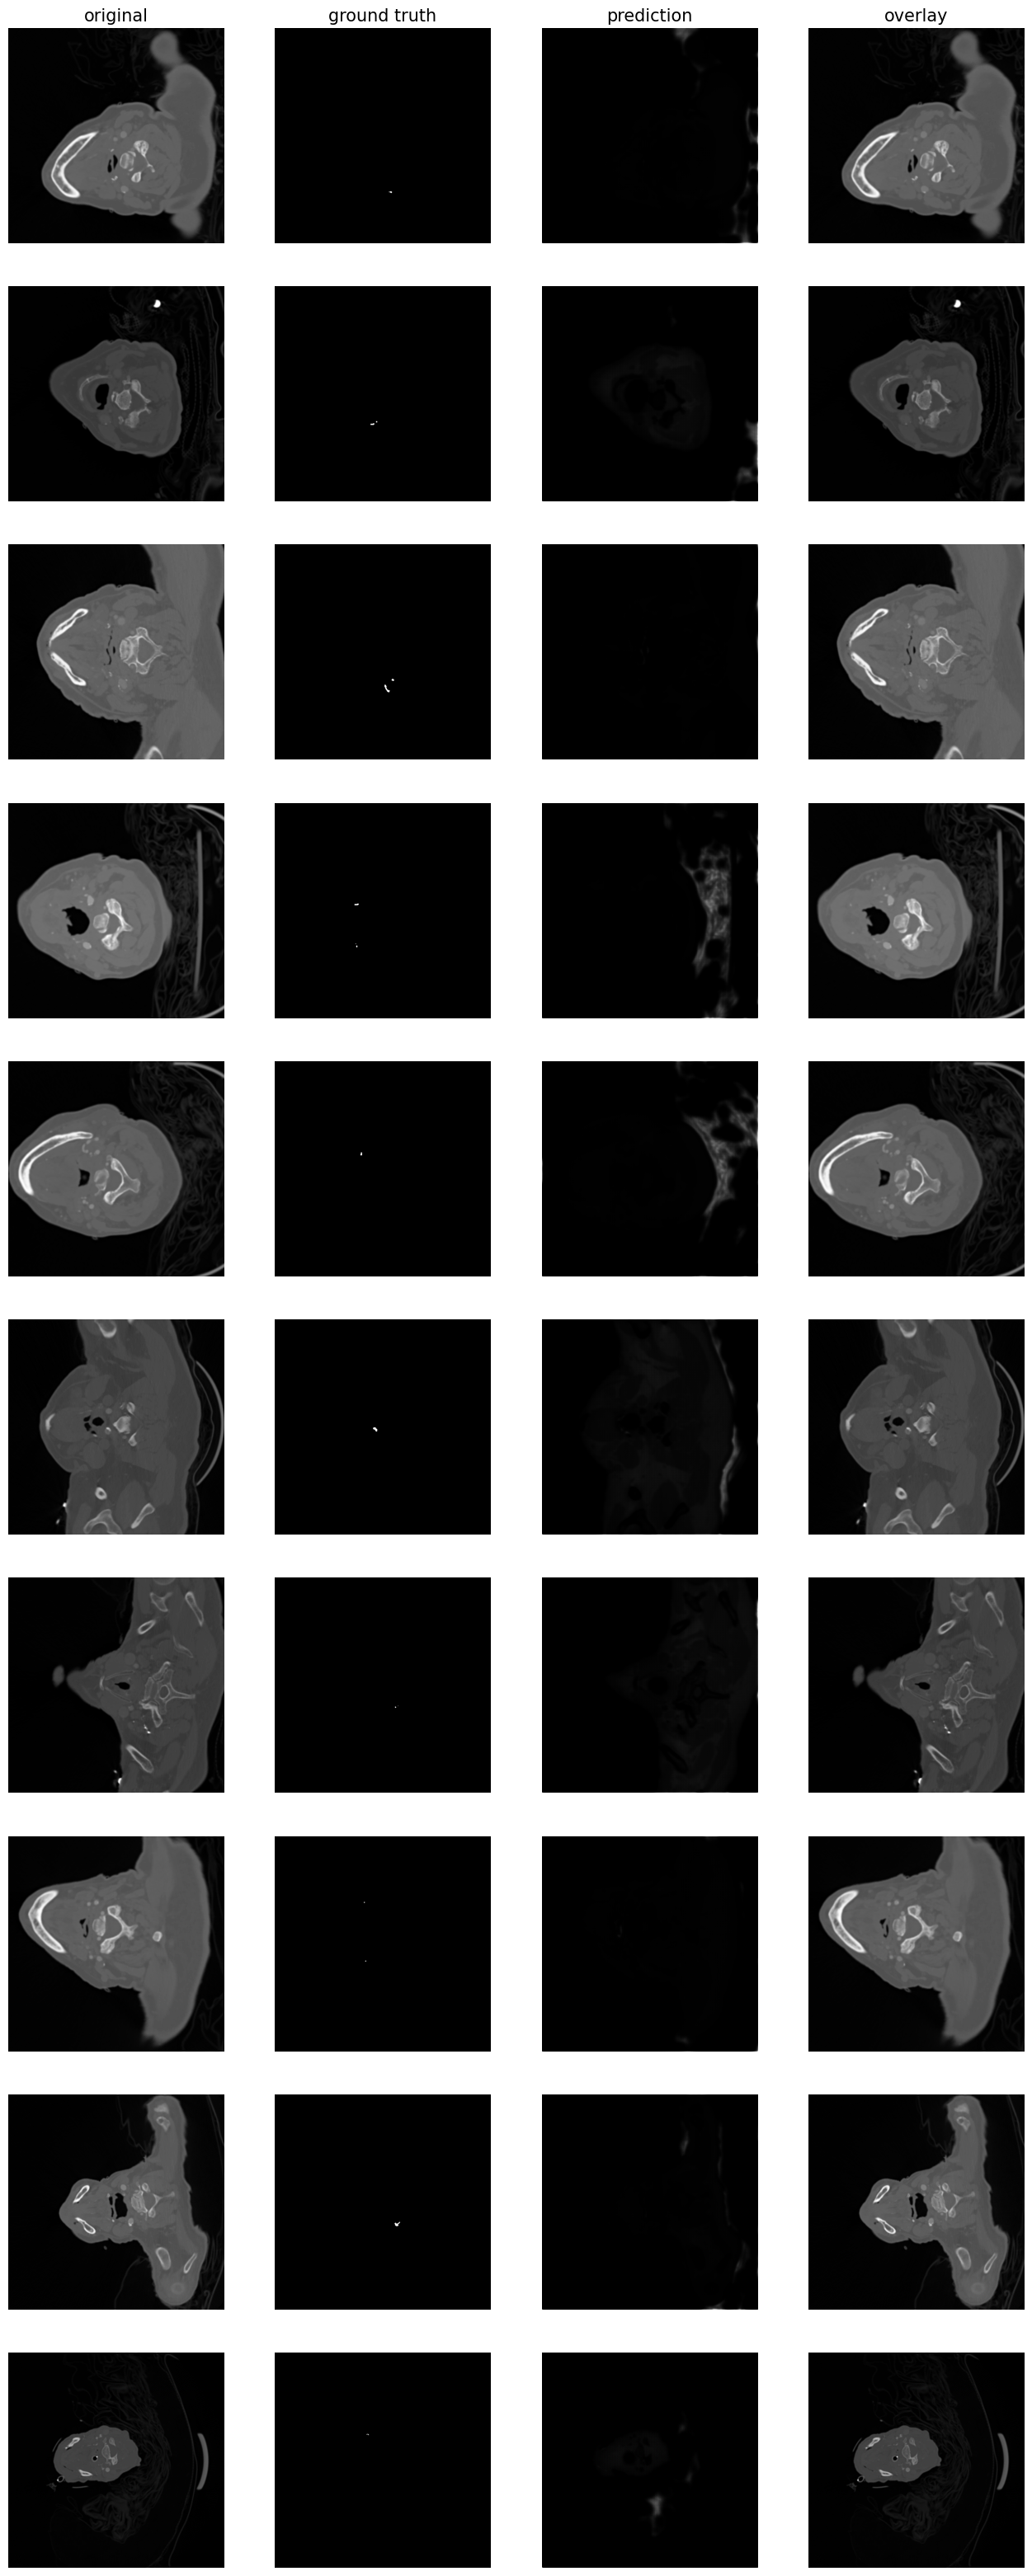

In [12]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=X_val, mask_imgs=y_val, pred_imgs=y_pred, nm_img_to_plot=10)

In [13]:
loss, iou, iou_thresholded = model.evaluate(X_val, y_val)

4/4 [==============================] - 1s 157ms/step - loss: 0.0031 - iou: 2.8981e-04 - iou_thresholded: 0.0013


In [27]:
import mahotas as mh

In [28]:
image = X_test[0]

In [29]:
image.shape

(512, 512, 1)

In [30]:
label = y_test[0]

In [31]:
pred = y_pred[0]

In [32]:
bbox = mh.bbox(label)
incr=30

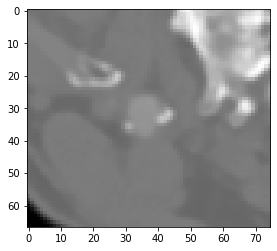

In [33]:
imshow(image[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:],cmap='gray')

In [34]:
X_test_c = []
y_test_c = []
y_pred_c = []

for i,z in enumerate(X_test):
    
    image = X_test[i]
    label = y_test[i]
    pred = y_pred[i]
    
    bbox = mh.bbox(label)
    incr=30
    X_test_c.append(image[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_test_c.append(label[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])
    y_pred_c.append(pred[bbox[0]-incr:bbox[1]+incr,bbox[2]-incr:bbox[3]+incr,:])


In [35]:
maxX = 0
maxY = 0

for i,z in enumerate(X_test_c):
    
    maxX = max(z.shape[1], maxX)
    maxY = max(z.shape[0], maxY)
    
X_test_c_np = np.zeros((len(X_test_c), maxY, maxX,1), dtype=X_test.dtype)
y_test_c_np = np.zeros((len(y_test_c), maxY, maxX,1), dtype=y_test.dtype)
y_pred_c_np = np.zeros((len(y_pred_c), maxY, maxX,1), dtype=y_pred.dtype)

for i,z in enumerate(X_test_c):
    
    image = X_test_c[i]
    label = y_test_c[i]
    pred = y_pred_c[i]
    
    X_test_c_np[i][0:image.shape[0], 0:image.shape[1],:] = image
    y_test_c_np[i][0:label.shape[0], 0:label.shape[1],:] = label
    y_pred_c_np[i][0:pred.shape[0], 0:pred.shape[1],:] = pred
    

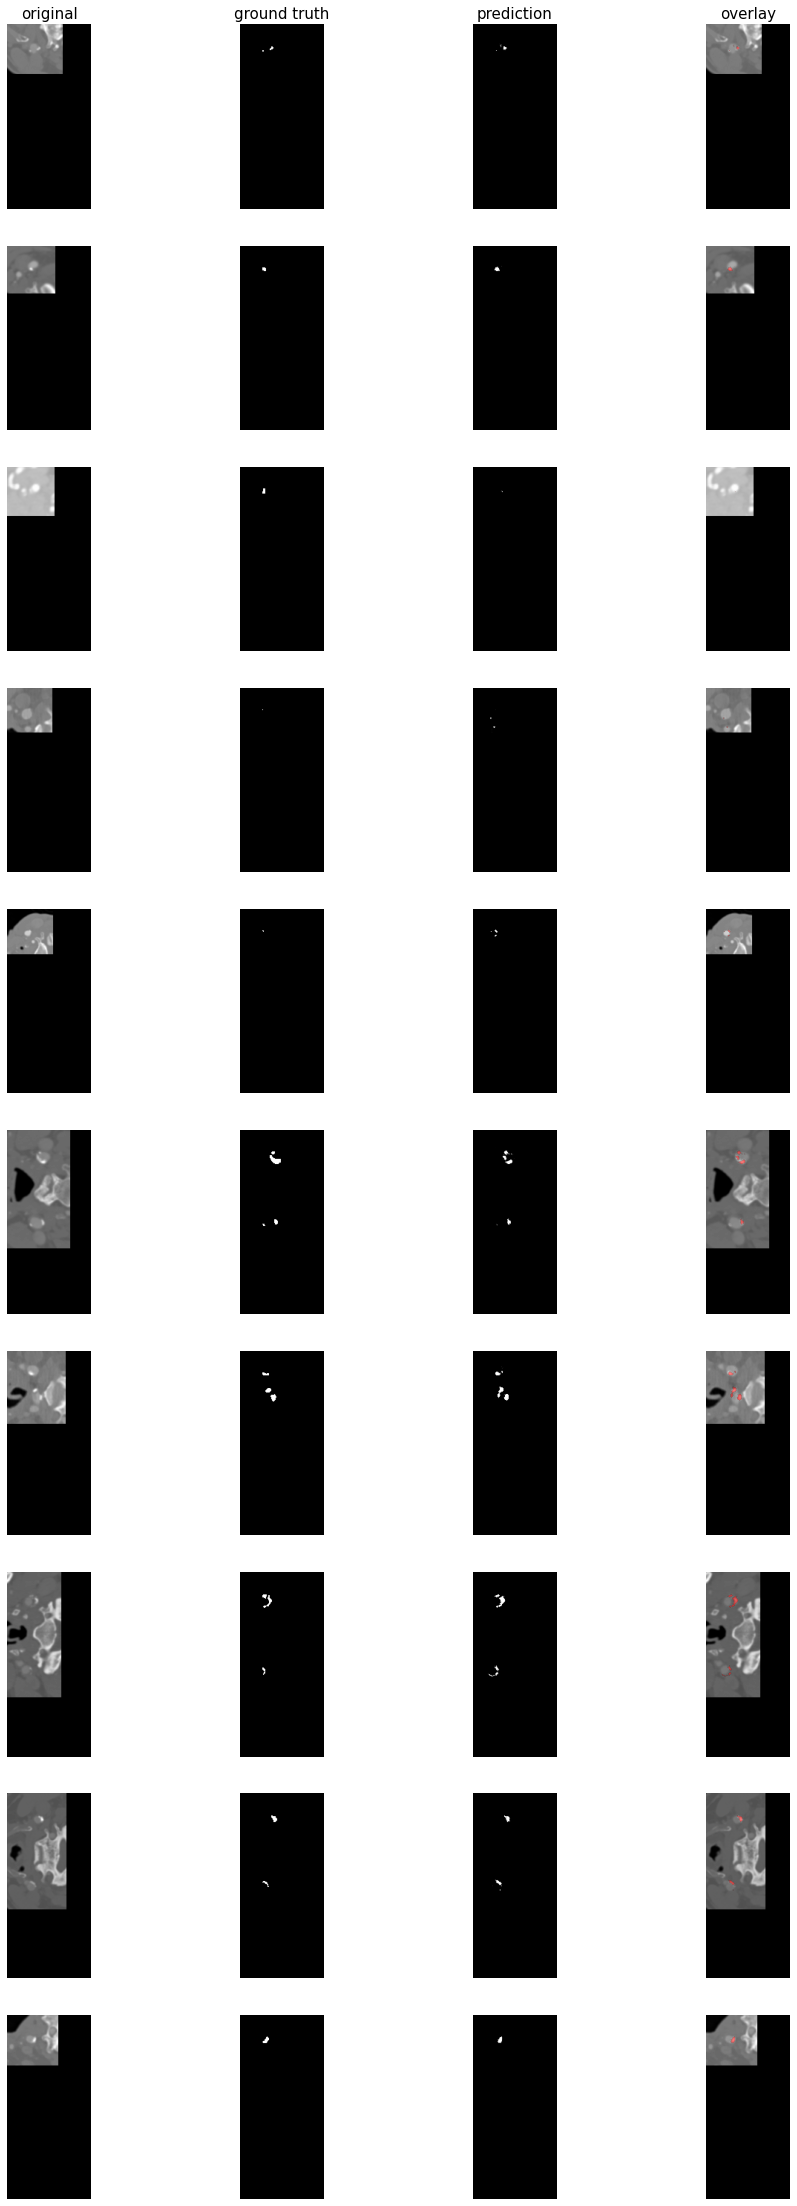

In [36]:
plot_imgs(org_imgs=X_test_c_np, mask_imgs=y_test_c_np, pred_imgs=y_pred_c_np)